# Testing everything

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [9]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

(array([0.00510565, 0.00765847, 0.01531695, 0.03829237, 0.06637345,
        0.08169039, 0.12764124, 0.13274689, 0.10211299, 0.08679604,
        0.04339802, 0.0306339 , 0.0306339 , 0.01786977, 0.04595085,
        0.04850367, 0.08424322, 0.17614491, 0.24251836, 0.2986805 ,
        0.23230706, 0.26038813, 0.19146186, 0.09445452, 0.0612678 ,
        0.01786977, 0.00510565, 0.00255282, 0.00255282, 0.00255282]),
 array([-2.793085  , -2.40136208, -2.00963915, -1.61791623, -1.22619331,
        -0.83447038, -0.44274746, -0.05102454,  0.34069839,  0.73242131,
         1.12414423,  1.51586716,  1.90759008,  2.29931301,  2.69103593,
         3.08275885,  3.47448178,  3.8662047 ,  4.25792762,  4.64965055,
         5.04137347,  5.43309639,  5.82481932,  6.21654224,  6.60826516,
         6.99998809,  7.39171101,  7.78343393,  8.17515686,  8.56687978,
         8.9586027 ]),
 <BarContainer object of 30 artists>)

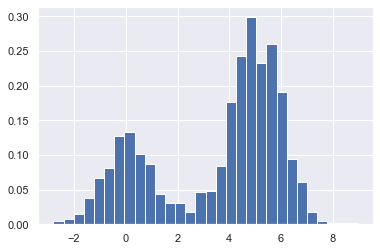

In [12]:
plt.hist(x, bins=30, density=True)

In [3]:
mu_coef = {'all':0.3,90:0.3,5:0.15,10:0.15,30:0.10}
x = mu_coef.keys()-['all']


set

In [11]:
import pandas as pd
from datetime import datetime, timedelta
xls = 'historico_cotacoes.xlsx'
to_date = lambda d: datetime.strptime(d, '%Y-%m-%d')
converters={'date': to_date}

novo_dict_df = dict()

dict_df = {key.strip():value for key,value in pd.read_excel(xls,sheet_name=None).items() if key != 'LU0122613903'}

In [12]:
start_date = max([df['Date'].min() for k,df in dict_df.items()]).date()
end_date = min([df['Date'].max() for k,df in dict_df.items()]).date()

datetime.date(2022, 9, 15)

In [24]:

df = pd.concat([df.set_index(keys='Date').rename(columns={'Close':key})[end_date:start_date] for key,df in dict_df.items()],axis=1).interpolate()
df.to_csv('cotacoes.csv')

